# About Dataset

The dataset contains EEG signals from 11 subjects with labels of alert and drowsy. It can be opened with Matlab. We extracted the data for our own research purpose from another public dataset:

Cao, Z., et al., Multi-channel EEG recordings during a sustained-attention driving task. Scientific data, 2019. 6(1): p. 1-8.

If you find the dataset useful, please give credits to their works.

The details on how the data were extracted are described in our paper:

"Jian Cui, Zirui Lan, Yisi Liu, Ruilin Li, Fan Li, Olga Sourina, Wolfgang Müller-Wittig, A Compact and Interpretable Convolutional Neural Network for Cross-Subject Driver Drowsiness Detection from Single-Channel EEG, Methods, 2021, ISSN 1046-2023, https://doi.org/10.1016/j.ymeth.2021.04.017."

The codes of the paper above are accessible from:

https://github.com/cuijiancorbin/A-Compact-and-Interpretable-Convolutional-Neural-Network-for-Single-Channel-EEG

The data file contains 3 variables and they are EEGsample, substate and subindex.

"EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.
"subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
"substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

The unbalanced version of this dataset is accessible from:
https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset_unbalanced_/16586957

# Importing Libraires 

In [1]:
import scipy.io
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Loading Dataset

In [2]:
import scipy.io

# Load the data from the provided .mat file
file_path = 'EEG driver drowsiness dataset.mat'
mat_data = scipy.io.loadmat(file_path)

# Inspecting the keys and structure of the loaded data
mat_data.keys(), {key: type(mat_data[key]) for key in mat_data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

# Inspecting the shape and content of the EEGsample, subindex, and substate arrays

In [3]:
# Inspecting the shape and content of the EEGsample, subindex, and substate arrays
eeg_sample_shape = mat_data['EEGsample'].shape
subindex_shape = mat_data['subindex'].shape
substate_shape = mat_data['substate'].shape

eeg_sample_shape, subindex_shape, substate_shape

((2022, 30, 384), (2022, 1), (2022, 1))

In [4]:
print(mat_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 12 16:15:31 2019', '__version__': '1.0', '__globals__': [], 'EEGsample': array([[[ 4.08097622e+00,  5.36373657e+00,  2.16892286e+00, ...,
         -2.43467111e+00, -1.08033326e+01, -4.06570287e+00],
        [ 3.78602291e+00,  6.18806022e+00,  1.72710622e+00, ...,
         -2.23788269e+00, -1.08040545e+01, -3.16985550e+00],
        [ 8.34680437e+00,  8.69160090e+00, -1.09056499e-02, ...,
          2.30521997e+00, -1.33921422e+01, -5.27739673e+00],
        ...,
        [ 1.52884814e+00,  7.93795880e-01, -1.45126572e+00, ...,
         -1.22710349e+00, -5.26310889e+00, -1.22684549e+00],
        [-1.19949821e+00, -1.54496214e+00, -4.31985930e+00, ...,
         -5.32550694e+00, -5.48814272e+00, -1.57636907e+00],
        [ 1.59400945e+00,  1.90051435e+00, -4.64426331e+00, ...,
         -3.48251971e+00, -2.09547756e+00,  4.01980667e+00]],

       [[ 5.10435476e+00,  2.66309990e-01,  3.92736106e+00, ...,
         -2.43

#### "EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.

#### "subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample. 

#### "substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

# Analyzing EEG Data: Determining Sample Shape, Channel Count, and Duration

In [5]:
# Access the EEG data and other relevant information
data = mat_data
eeg_samples = data['EEGsample']
subindex = data['subindex']
substate = data['substate']



num_samples, num_channels, num_time_points = eeg_sample_shape
subject_indexes = mat_data['subindex'].flatten()
labels = mat_data['substate'].flatten()

In [6]:
num_samples

2022

In [7]:
num_channels

30

In [8]:
num_time_points

384

### Calculate the duration of each sample in seconds

In [9]:
# Calculate the duration of each sample in seconds
sampling_rate = 128  # Hz
sample_duration = num_time_points / sampling_rate

In [10]:
print("Number of subjects:", len(np.unique(subject_indexes)))
print("EEGsample shape:", eeg_sample_shape)
print("Number of Samples:", num_samples)
print("Number of Channels:", num_channels)
print("Number of Time Points:", num_time_points)
print("Sample Duration (seconds):", sample_duration)

unique_labels, label_counts = np.unique(labels, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", label_counts) 

Number of subjects: 11
EEGsample shape: (2022, 30, 384)
Number of Samples: 2022
Number of Channels: 30
Number of Time Points: 384
Sample Duration (seconds): 3.0
Unique labels: [0 1]
Label counts: [1011 1011]


# Compute basic statistics for each EEG channel

In [11]:
# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Display basic statistics for each EEG channel
for channel_index in range(num_channels):
    print("Channel {}: Mean: {:.4f}, Std: {:.4f}, Min: {:.4f}, Max: {:.4f}".format(
        channel_index + 1, mean_values[channel_index], std_values[channel_index],
        min_values[channel_index], max_values[channel_index]
    ))

Channel 1: Mean: -0.0216, Std: 14.6210, Min: -573.2365, Max: 871.9078
Channel 2: Mean: -0.0408, Std: 14.9052, Min: -1299.3223, Max: 911.1531
Channel 3: Mean: -0.0046, Std: 9.6717, Min: -208.1605, Max: 243.2860
Channel 4: Mean: -0.0555, Std: 23.2757, Min: -1302.3108, Max: 1795.5439
Channel 5: Mean: -0.0682, Std: 10.7254, Min: -259.1864, Max: 157.8684
Channel 6: Mean: -0.0663, Std: 22.3244, Min: -1914.6017, Max: 1294.2410
Channel 7: Mean: -0.0535, Std: 11.2602, Min: -496.5066, Max: 754.2102
Channel 8: Mean: -0.0116, Std: 8.9256, Min: -257.1262, Max: 178.2628
Channel 9: Mean: -0.0536, Std: 10.5208, Min: -264.4460, Max: 358.2625
Channel 10: Mean: -0.0603, Std: 11.0738, Min: -170.1104, Max: 172.7116
Channel 11: Mean: -0.0571, Std: 10.8091, Min: -220.8742, Max: 281.4221
Channel 12: Mean: -0.0451, Std: 9.3398, Min: -249.3489, Max: 203.9866
Channel 13: Mean: 0.1597, Std: 88.7564, Min: -3195.4259, Max: 3430.9080
Channel 14: Mean: -0.0544, Std: 10.0442, Min: -259.9218, Max: 369.9024
Channel 15: 

# Check for missing values

In [12]:
# Check for missing values
missing_values = np.isnan(eeg_samples).sum()
if missing_values == 0:
    print("No missing values in the EEG data.")
else:
    print("Number of missing values:", missing_values)

No missing values in the EEG data.


# Compute summary statistics of EEG Signal

In [13]:
# Compute summary statistics of EEG Signal
mean_amplitude = np.mean(eeg_sample_shape)
median_amplitude = np.median(eeg_sample_shape)
std_deviation = np.std(eeg_sample_shape)
quartiles = np.percentile(eeg_sample_shape, [25, 50, 75])

print("Summary Statistics of EEG Signal:")
print("Mean Amplitude:", mean_amplitude)
print("Median Amplitude:", median_amplitude)
print("Standard Deviation:", std_deviation)
print("Quartiles (25th, 50th, 75th):", quartiles)

Summary Statistics of EEG Signal:
Mean Amplitude: 812.0
Median Amplitude: 384.0
Standard Deviation: 867.718848475703
Quartiles (25th, 50th, 75th): [ 207.  384. 1203.]


# Data Visualization

# Time-domain Visualization

### Function to plot EEG sample

In [14]:
def plot_eeg_sample(eeg_data, sample_rate, title):
    plt.figure(figsize=(15, 6))
    for i in range(eeg_data.shape[0]):
        plt.plot(np.arange(eeg_data.shape[1]) / sample_rate, eeg_data[i, :] + i*100, label=f'Channel {i+1}')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

### Selecting parameter for Alert and Drowsy states

In [15]:
alert_sample = eeg_samples[substate.ravel() == 0][0]  # First sample of alert state
drowsy_sample = eeg_samples[substate.ravel() == 1][0]  # First sample of drowsy state
sample_rate = 128  # Sampling rate

# Plotting time-domain representations

## Time-domain Alert State

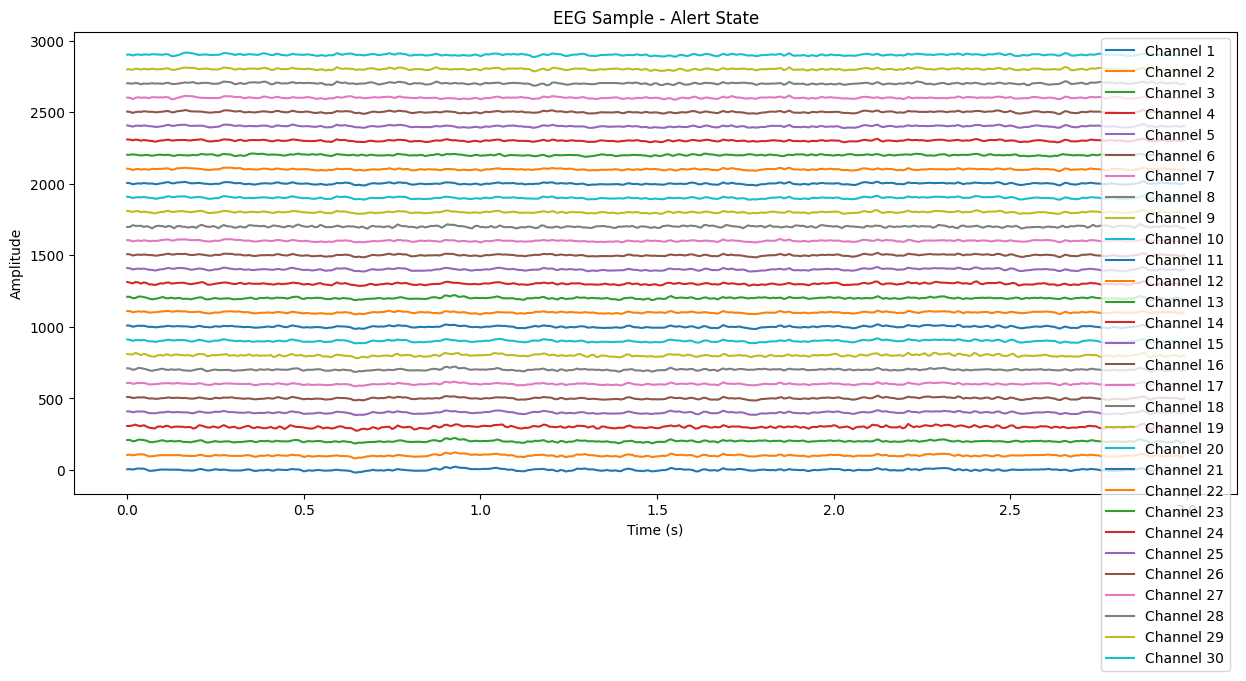

In [16]:
plot_eeg_sample(alert_sample, sample_rate, 'EEG Sample - Alert State')

## Time-domain Drowsy State

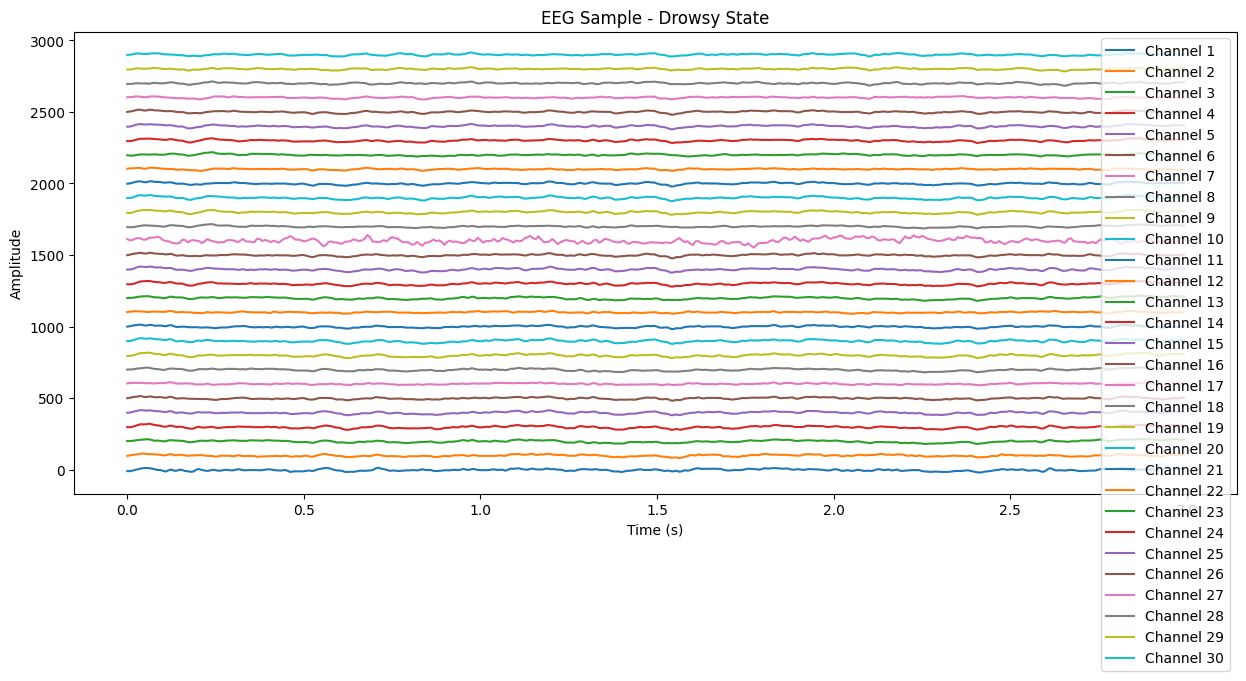

In [17]:
plot_eeg_sample(drowsy_sample, sample_rate, 'EEG Sample - Drowsy State')

# Reshaping EEGsamples to a 2D array and Defining X and y 

In [18]:
# Access the EEG data and other relevant information
data = mat_data
eeg_samples = data['EEGsample']
subindex = data['subindex']
substate = data['substate']

# Reshaping EEGsamples to a 2D array
num_samples, num_channels, num_time_points = eeg_sample_shape


X = eeg_samples.reshape((num_samples, num_channels * num_time_points))
y = substate

# Split the dataset into training and testing sets

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing Libraries

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score

# Initialize the models

In [21]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}

# Training the models

In [22]:
model_results = {}

for name, model in models.items():
    try:
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Store results
        model_results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc,
            'Classification Report': report
        }
    except Exception as e:
        model_results[name] = f"Error occurred: {e}"

# Display the results
for model_name, results in model_results.items():
    print(f"Results for {model_name}:")
    for metric, value in results.items():
        if metric == 'Classification Report':
            print("\nClassification Report:\n", value)
        else:
            print(f"{metric}: {value:.4f}")
    print("\n" + "-"*50 + "\n")


C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nafem\AppData\Local\Temp\ipykernel_12880\188725175.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Results for Logistic Regression:
Accuracy: 0.5111
Precision: 0.5300
Recall: 0.5048
F1 Score: 0.5171
ROC AUC: 0.5114

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.52      0.51       195
           1       0.53      0.50      0.52       210

    accuracy                           0.51       405
   macro avg       0.51      0.51      0.51       405
weighted avg       0.51      0.51      0.51       405


--------------------------------------------------

Results for Random Forest:
Accuracy: 0.7210
Precision: 0.7046
Recall: 0.7952
F1 Score: 0.7472
ROC AUC: 0.7181

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69       195
           1       0.70      0.80      0.75       210

    accuracy                           0.72       405
   macro avg       0.72      0.72      0.72       405
weighted avg       0.72      0.72      0.72       405


----------------